In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt



/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [64]:
#условие размера графиков
sns.set(rc={'figure.figsize':(12,4)}, style="whitegrid")

In [15]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/groups.csv', sep=';') #- файл с информацией 
#о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)
 

In [16]:
groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/group_add.csv') #дополнительный файл
#с пользователями, который вам прислали спустя 2 дня после передачи данных

In [17]:
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/active_studs.csv') #файл с 
#информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.

In [18]:
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/checks.csv', sep=';') #файл с информацией об 
#оплатах пользователей в дни проведения эксперимента. 

In [7]:
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [8]:
groups_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [9]:
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [10]:
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [ ]:
#Вопросы
#1)На какие метрики Вы смотрите в ходе анализа и почему?
#2)Имеются ли различия в показателях и с чем они могут быть связаны?
#3)Являются ли эти различия статистически значимыми?
#4)Стоит ли запускать новую механику на всех пользователей?

In [ ]:
#Ответы:
#1)Средняя сумма оплаты (checks.rev)  Потому что чем больше сумма оплаты , тем успешнее новая механика оплаты.

In [ ]:
#Нулевая гипотеза (H0): Разницы между средней суммой в тестовой и контрольной группе нет
#Альтернативная гипотеза (H1): Разница между средней суммой  в тестовой и контрольной группе есть

In [11]:
#Объединяем группы в одну
groups_all = pd.concat([groups, groups_add], axis=0)


In [15]:
groups_all

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [16]:
#проверка дубликатов
groups_all.duplicated().sum()

0

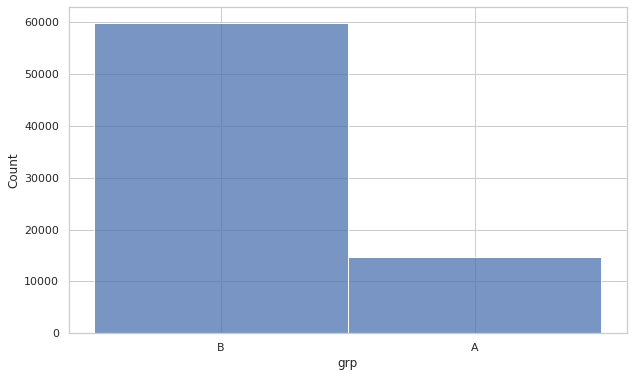

In [17]:
#провекра количества пользователей по группам
sns.histplot(data=groups_all, x="grp")

In [18]:
#Исправляем название колонки для идентичности с другими датасетами
checks.rename(columns={'student_id': 'id'}, inplace=True)

In [19]:
#Объединяем датасеты groups_all с checks , таким образом мы узнаем количество человек, оплативших услугу по группам
checks_group = pd.merge(checks, groups_all, how='inner', on='id')


In [20]:
checks_group

,id,rev,grp
0,1627,990.0,A
1,3185,690.0,B
2,25973,690.0,B
3,26280,690.0,B
4,100300,990.0,B
...,...,...,...
536,5645737,1900.0,B
537,5651566,1900.0,B
538,5662322,1900.0,B
539,5681918,1900.0,B


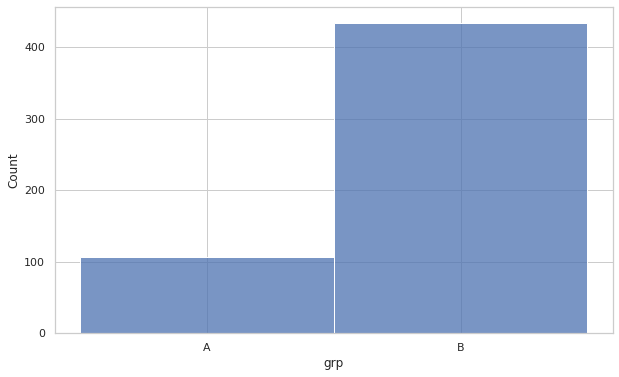

In [31]:
sns.histplot(data=checks_group, x="grp")
#размеры групп сильно различаются, необходимо быть особенно осторожным и обращать внимание на возможные искажения в результатах теста

In [22]:
checks_group.groupby('grp').rev.describe()
#стандартное отклонение слишком велико
#среднее значение в тестовой группе выше чем среднее значение в контрольной группе

,count,mean,std,min,25%,50%,75%,max
grp,,,,,,,,
A,107.0,860.710280,815.893445,199.0,290.00,690.0,990.0,3660.0
B,434.0,1108.824893,741.834304,199.0,420.75,935.0,1900.0,4650.0


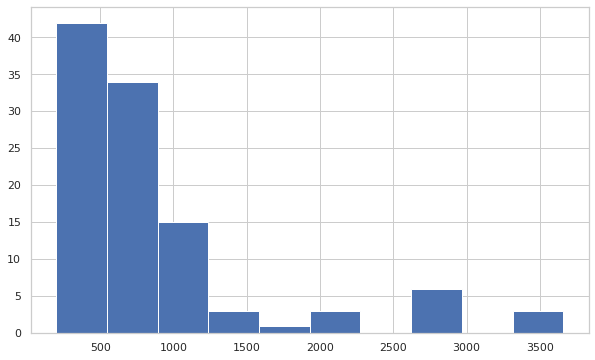

In [32]:
#График распределения контр группы
checks_group.query("grp == 'A'").rev.hist()

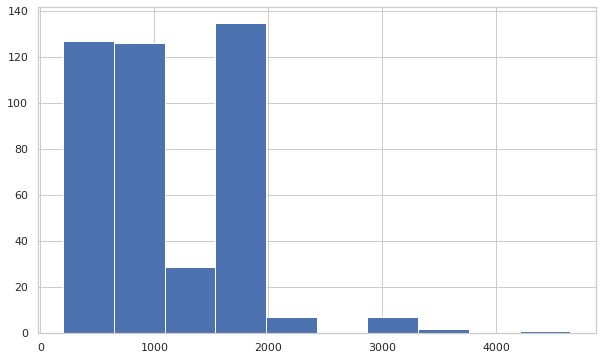

In [33]:
#График распределения тестовой группы
checks_group.query("grp == 'B'").rev.hist()

In [23]:
#прологарифмируем значения так как десперсия высокая
checks_group['rev_log'] = np.log(checks_group['rev'])

In [24]:
# находим стандартное отклонение
checks_group.groupby('grp').rev_log.std()

grp
A    0.778520
B    0.804551
Name: rev_log, dtype: float64

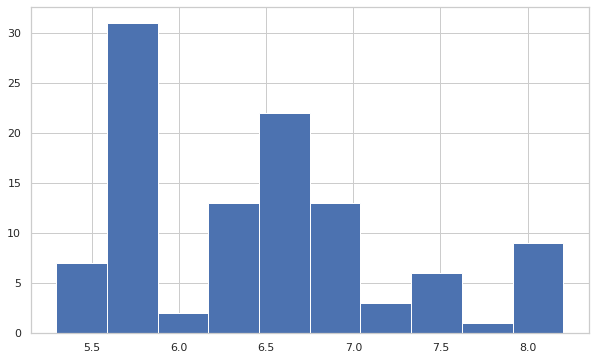

In [26]:
#График распределения прологарифмированной контр группы 
checks_group.query("grp == 'A'").rev_log.hist()

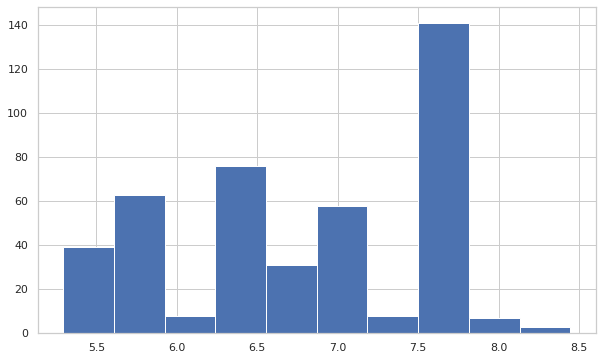

In [27]:
#График распределения прологарифмированной тестовой группы
checks_group.query("grp == 'B'").rev_log.hist()

In [25]:
# проверка на нормальность
pg.normality(data=checks_group, dv="rev_log", group="grp", method="normaltest")
#Вывод: распределение во всех выборках ненормальное

,W,pval,normal
A,6.233411,4.430289e-02,False
B,121.525064,4.084770e-27,False


In [28]:
#метод сэмплирования контрольной группы. Вывод: распределение ненормальное
st.shapiro(checks_group.query("grp == 'A'").rev_log.sample(100, random_state=17))

ShapiroResult(statistic=0.9196147322654724, pvalue=1.3428325473796576e-05)

In [29]:
#метод сэмплирования тестовой группы. Вывод: распределение ненормальное

st.shapiro(checks_group.query("grp == 'B'").rev_log.sample(100, random_state=17))

ShapiroResult(statistic=0.8778303861618042, pvalue=1.4706712647694076e-07)

In [30]:
#сравниваем значения в тесте и контроле через scipy

st.ttest_ind(a=checks_group.query("grp == 'B'").rev_log, 
             b=checks_group.query("grp == 'A'").rev_log, equal_var=True)

Ttest_indResult(statistic=3.5317260011999596, pvalue=0.0004482400492255433)

In [31]:
#сравниваем значения в тесте и контроле через pg

pg.ttest(x=checks_group.query("grp == 'B'").rev_log, 
             y=checks_group.query("grp == 'A'").rev_log)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.602752,166.346707,two-sided,0.000416,"[0.14, 0.47]",0.381196,57.57,0.941263


In [32]:
#попробуем для сравнения Манна-Уитни через scipy

st.mannwhitneyu(x=checks_group.query("grp == 'B'").rev_log, 
             y=checks_group.query("grp == 'A'").rev_log,)

MannwhitneyuResult(statistic=28576.0, pvalue=0.00019316054996380152)

In [33]:
# Манна-Уитни через pingouin

pg.mwu(x=checks_group.query("grp == 'B'").rev_log, 
             y=checks_group.query("grp == 'A'").rev_log)

,U-val,alternative,p-val,RBC,CLES
MWU,28576.0,two-sided,0.000193,-0.230716,0.615358


In [34]:
#Yuen t-test

st.ttest_ind(a=checks_group.query("grp == 'B'").rev_log, 
             b=checks_group.query("grp == 'A'").rev_log, trim=0.2)

Ttest_indResult(statistic=4.161433198938073, pvalue=4.0536893098479204e-05)

In [35]:
#permutation t-test

st.ttest_ind(a=checks_group.query("grp == 'B'").rev_log, 
             b=checks_group.query("grp == 'A'").rev_log, permutations=1000)

Ttest_indResult(statistic=3.5317260011999596, pvalue=0.0)

In [ ]:
#Вопросы
#1)На какие метрики Вы смотрите в ходе анализа и почему?
#2)Имеются ли различия в показателях и с чем они могут быть связаны?
#3)Являются ли эти различия статистически значимыми?
#4)Стоит ли запускать новую механику на всех пользователей?

In [ ]:
#Нулевая гипотеза (H0): Разницы между средней суммой в тестовой и контрольной группе нет
#Альтернативная гипотеза (H1): Разница между средней суммой  в тестовой и контрольной группе есть

In [ ]:
#Вывод:
#1)Я смотрю на среднюю сумму оплаты (checks.rev)  Потому что чем больше сумма оплаты , тем успешнее новая механика оплаты. 
#2)Cреднее значение в тестовой группе выше чем среднее значение в контрольной группе, это может быть связано с тем,
#что новая механика оплаты лучше
#Так как метрика является колличественной переменной и у нас есть 2 группы которые планируем сравнивать по одному критерию, 
#То  для сравения я использовал t-test Стьюдента, но так как распределение у нас ненормальное , для сравнения используем тест Уилкоксона (Mann-Whitney U-test)
# и permutation t-test и Yuen t-test. Во всех случиях pvalue<0.05 это значит что мы отклоняем нулевую гипотезу и применяем альтернативную
#что разница между средней суммой  в тестовой и контрольной группе есть и она статестически значима. 
#Поэтому доказанно, что запускать новую механику оплаты на всех пользователей стоит!